In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.metrics import roc_auc_score, roc_curve

working_directory = os.getcwd()
print(working_directory)

path = working_directory + '/cleaned_online_shopping_data.csv' 
df = pd.read_csv(os.path.join(os.getcwd(),'cleaned_online_shopping_data.csv'))

df = pd.read_csv(path) 

/Users/gabrielmancillas


In [8]:
df.columns

Index(['level_0', 'index', 'Unnamed: 0', 'Administrative',
       'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [9]:
df.isnull().sum()

level_0                    0
index                      0
Unnamed: 0                 0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Target Variable

In [10]:
df['Revenue'].value_counts(normalize=True)

Revenue
False    0.843494
True     0.156506
Name: proportion, dtype: float64

## Normalization

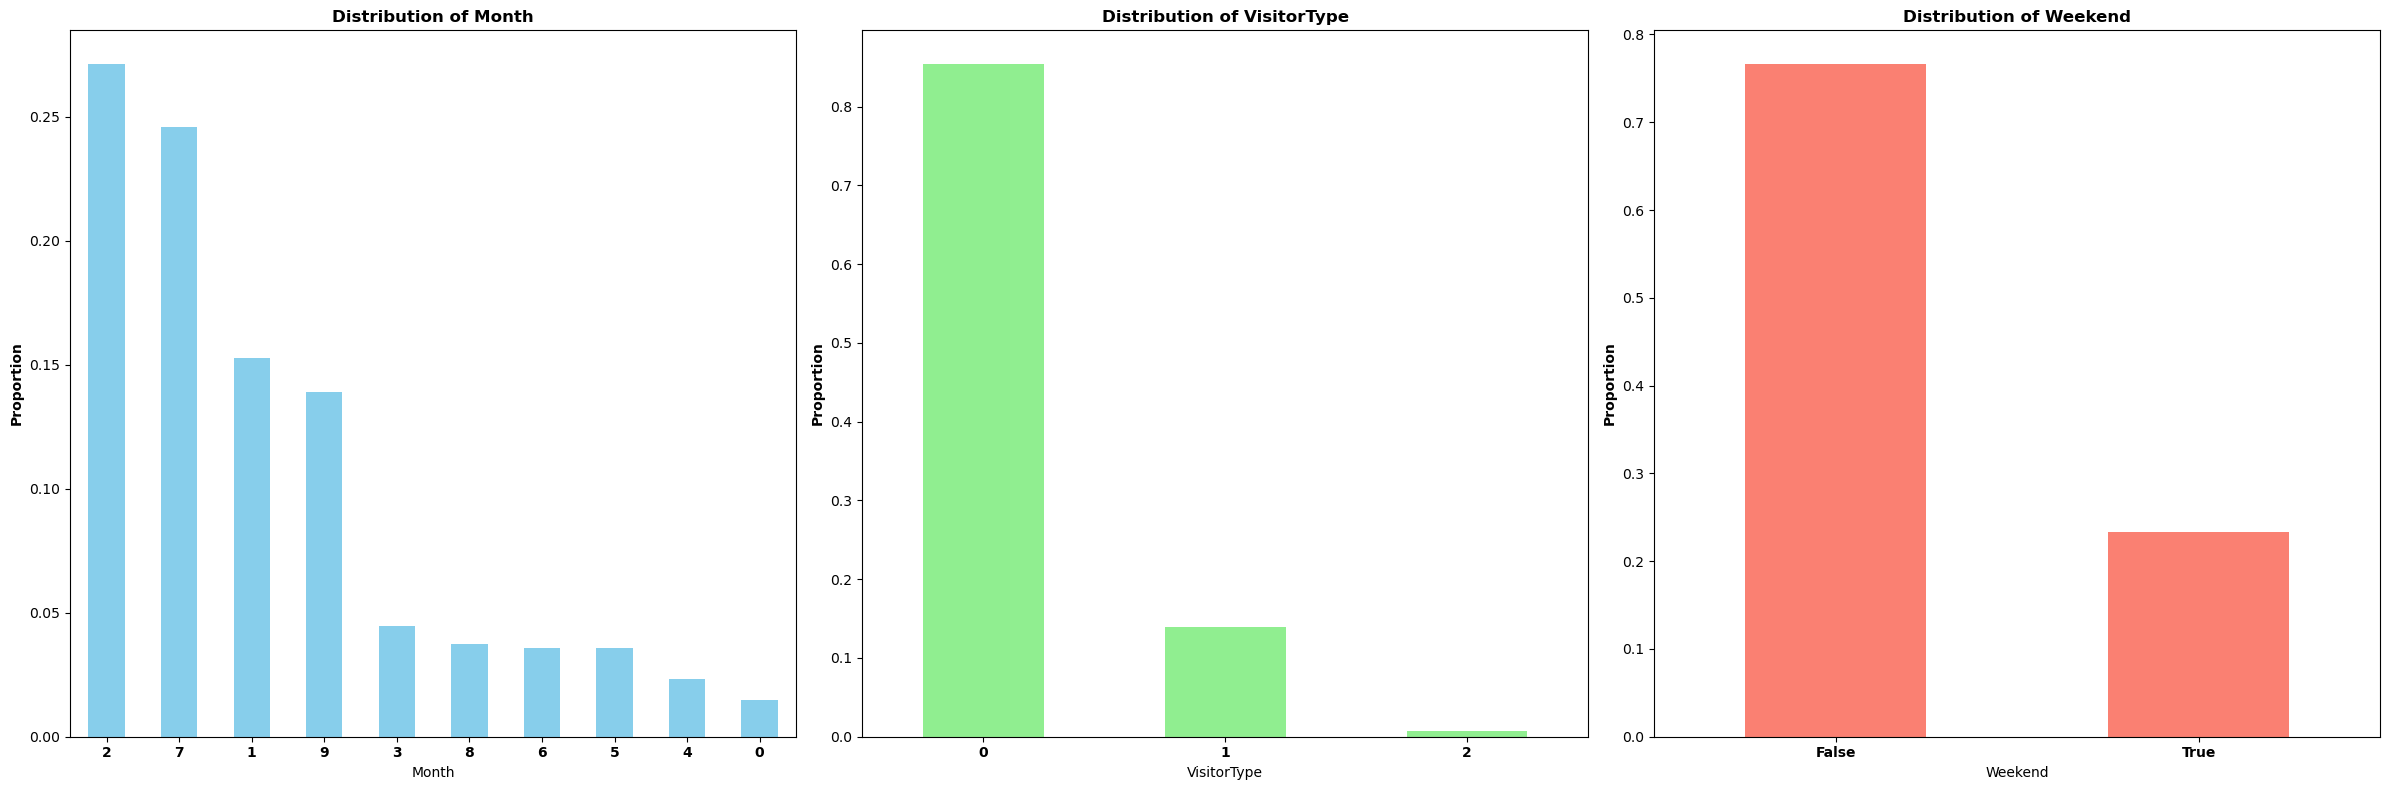

In [25]:
plt.figure(figsize=(24, 8))

columns = {
    'Month': 131,
    'VisitorType': 132,
    'Weekend': 133
}

colors = ['skyblue', 'lightgreen', 'salmon']


for i, (column, position) in enumerate(columns.items(), 1):
    plt.subplot(position)
    df[column].value_counts(normalize=True).plot.bar(title=column, color=colors[i-1])
    plt.title(f'Distribution of {column}', fontweight='bold')
    plt.ylabel('Proportion', fontweight='bold')
    plt.xticks(rotation=0, fontweight='bold')  

plt.tight_layout() 
plt.show()

## Notes

**Defining the subplots:** The columns dictionary maps the column names to subplot positions for a 1x3 grid layout (using matplotlib's subplot numbering system).

**Choosing colors:** A color list is defined to specify the color of the bars in each bar plot.

**Plotting loop:** The code loops over the columns dictionary and creates a bar plot for each categorical variable. Within each loop iteration:

- plt.subplot(position) specifies the position of the current subplot.
- df[column].value_counts(normalize=True).plot.bar() creates a normalized bar plot of the value counts for the given column, showing each category's proportion.
- A title is set for each subplot, which includes the column's name, and the title's font weight is made bold.
- The y-axis label 'Proportion' is set with bold font weight.
- The x-axis ticks are set with no rotation and bold font weight.
**Final adjustments:** plt.tight_layout() is called to adjust the subplots to fit into the figure area nicely.

**Displaying the figure:** plt.show() is called to display the figure with the three subplots.

The resulting visualization consists of three bar charts in one row, each showing the distribution of a different categorical variable. The use of normalization in value_counts() means that the y-axis represents the proportion of each category rather than the count, which allows for easy comparison between categories of different sizes. The use of different colors for each subplot enhances visual distinction.

#### It has been observed that more visitors tend to visit the website during May and November as compared to other months. Furthermore, the website has managed to garner a noteworthy count of recurrent visitors, consequently resulting in an enlarged dataset. It has also been noted that the majority of site visits occur on weekdays rather than weekends.

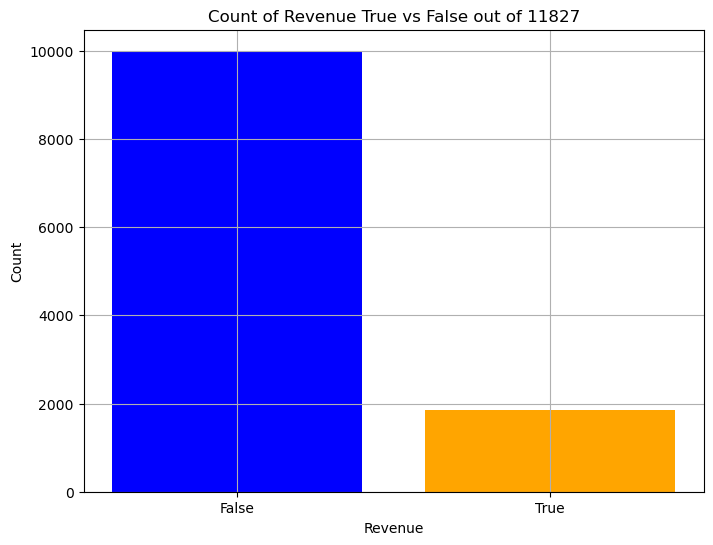

In [12]:
total = 11827
false_count = round(0.843494 * total)
true_count = total - false_count

labels = ['False', 'True']
counts = [false_count, true_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Count of Revenue True vs False out of 11827')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.grid(True)  
plt.show()

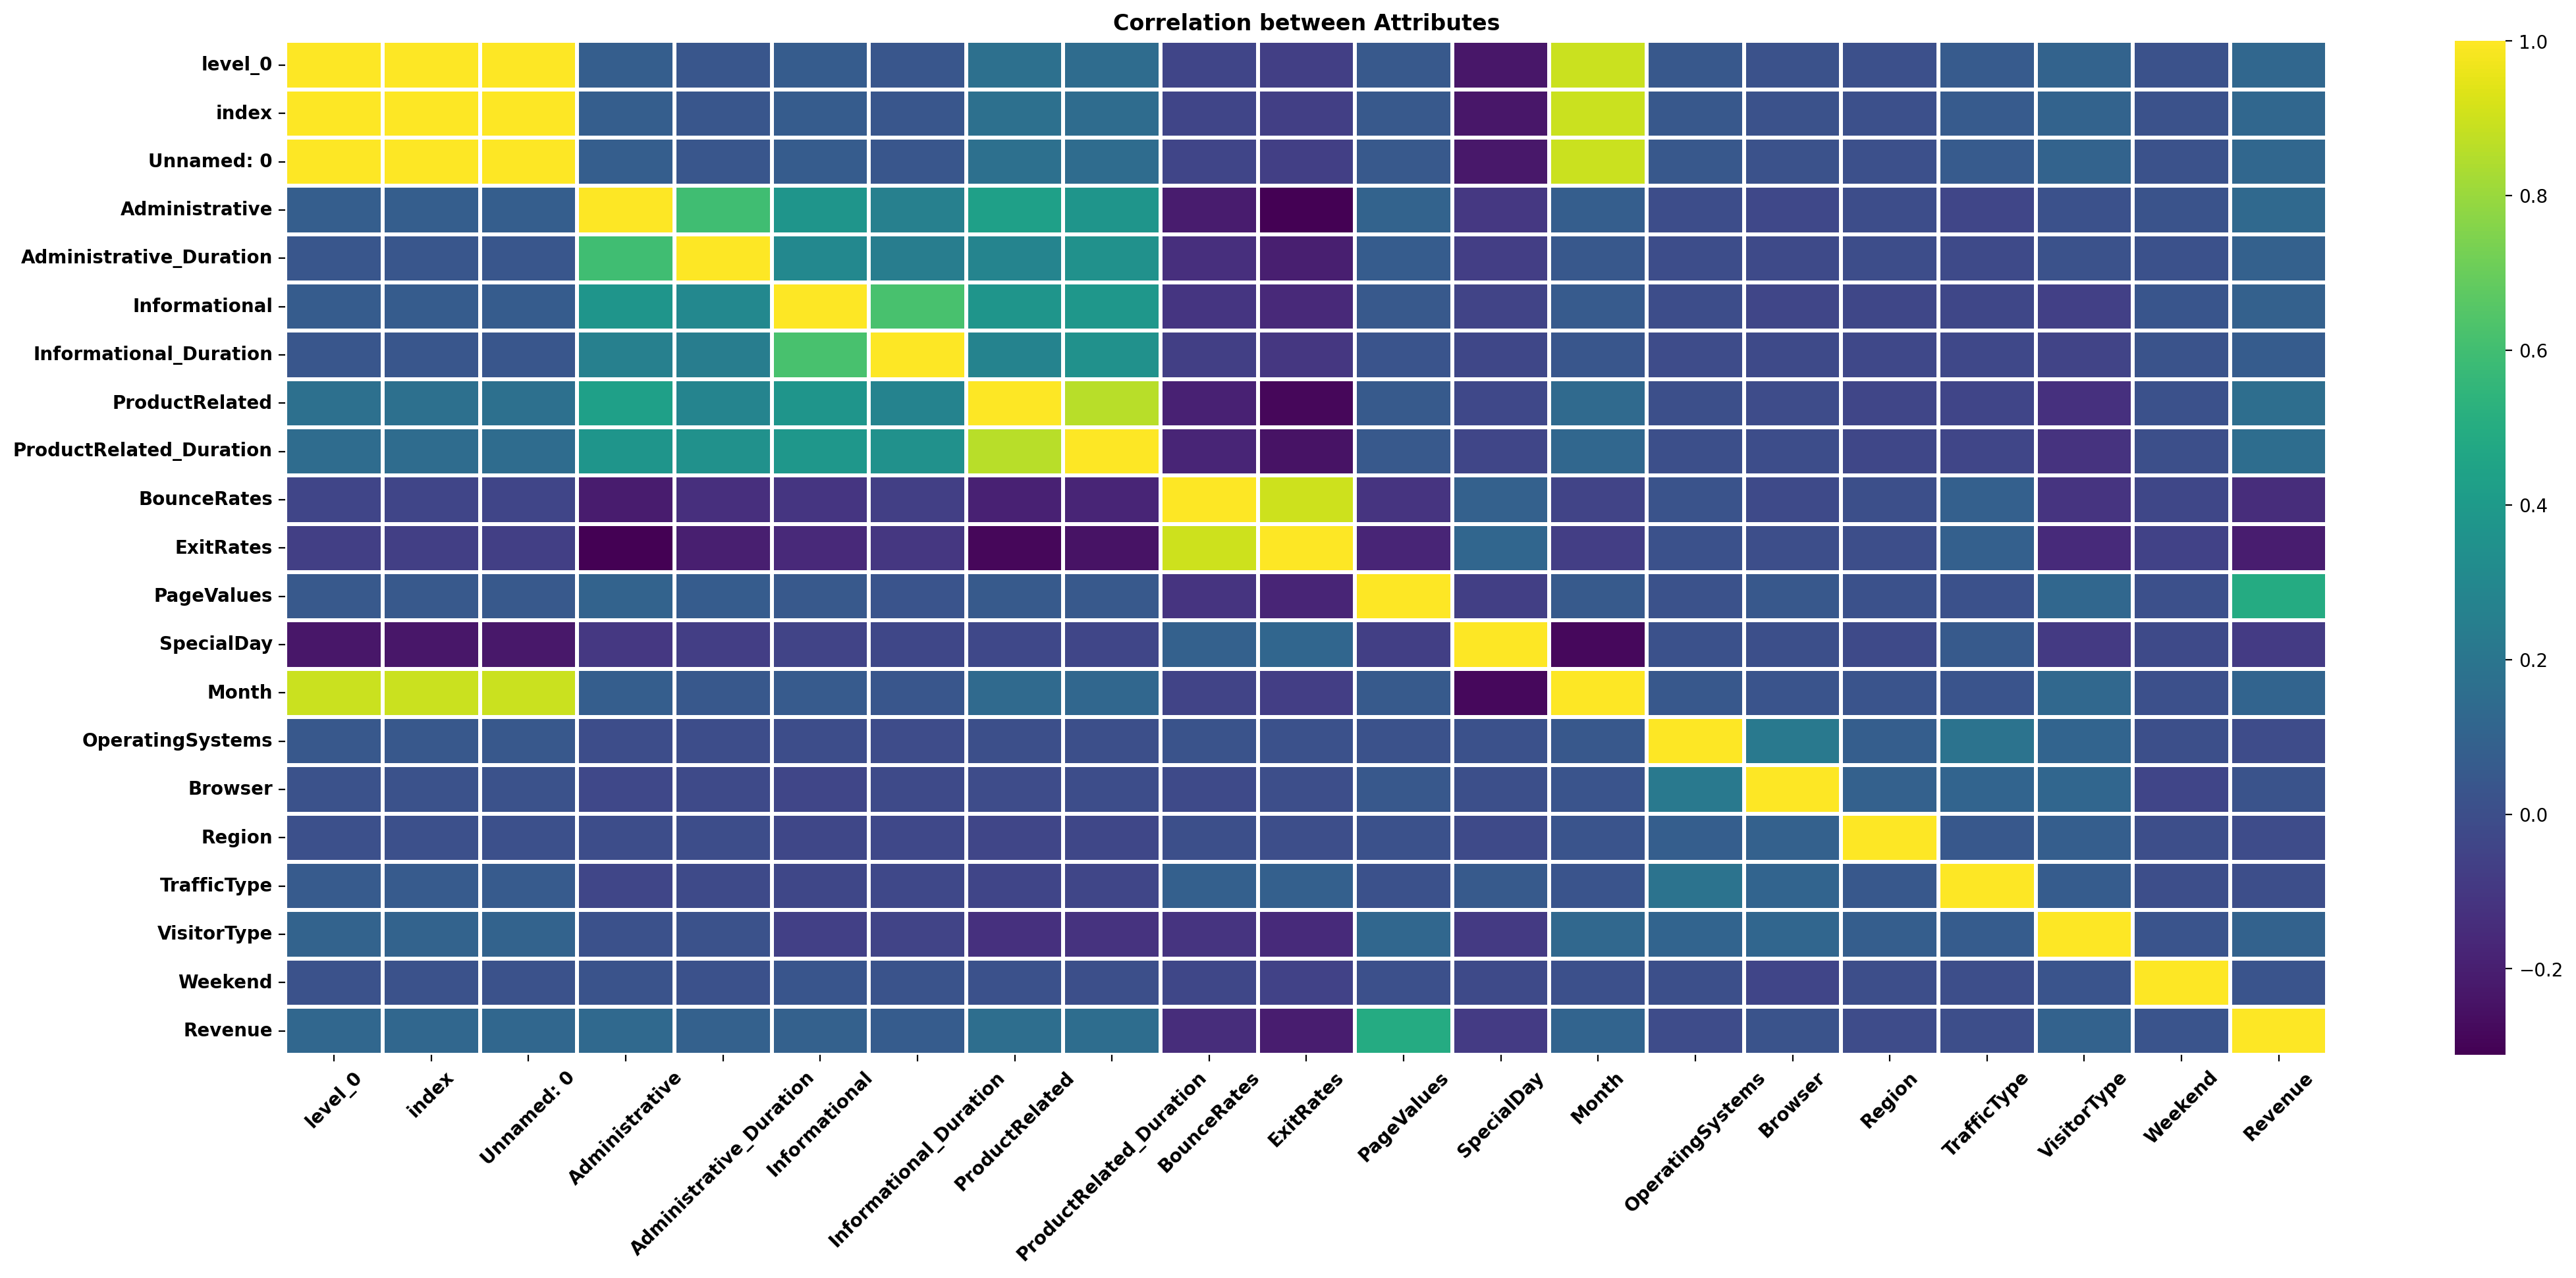

In [23]:

for col in df.select_dtypes(include='object').columns:
    df[col], _ = pd.factorize(df[col])

corr_matrix = df.corr()


plt.figure(figsize=(25, 10), dpi=200)
sns.heatmap(corr_matrix, linewidths=1.5, linecolor='white', cmap='viridis', annot=False)
plt.title('Correlation between Attributes', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(rotation=0, fontweight='bold')
plt.show()

##Notes

Factorization of non-numeric columns: The code begins by selecting columns with object data types (commonly strings in pandas) and factorizes them. Factorizing is the process of mapping each unique value to a sequential integer. This is necessary because correlation calculations require numerical input, and this step converts categorical data into a numeric format that can be used for such calculations.

- **Correlation matrix calculation:** Next, the code calculates the correlation matrix for the dataframe using df.corr(). This function computes pairwise correlations of columns, excluding NA/null values, using the standard Pearson correlation coefficient by default.

- **Heatmap plotting:** The correlation matrix is then visualized as a heatmap using Seaborn's heatmap function. The heatmap uses the 'viridis' colormap, which is a sequential colormap suitable for displaying ordered data varying from low to high. The plot is configured with a figure size of 25x10 inches and a resolution of 200 dpi, making it quite large and detailed.

- **Aesthetic settings:** The heatmap's aesthetic settings include linewidths between the cells, white lines for borders, and the absence of annotations (no correlation values displayed on the heatmap). The title of the plot is set to 'Correlation between Attributes', with bold font weights for the title and axis tick labels.
  
- The resulting heatmap shows the strength and direction of the linear relationship between the variables. In a correlation heatmap, a coefficient close to 1 implies a strong positive correlation, meaning that as one variable increases, the other also tends to increase. A coefficient close to -1 implies a strong negative correlation, where one variable increases as the other decreases. Coefficients near 0 imply little to no linear relationship.
Based on the colors in the heatmap, yellow represents higher positive correlation values, and purple represents lower or negative correlation values. The correlation heatmap is a useful tool for feature selection, as highly correlated features might be redundant in some machine learning models.

***